# 2. Statistical Learning

In [1]:
import janitor as jn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import interpolate

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

## 2.1 What Is Statistical Learning?

**Statistical Learning** - a set of approaches for estimating a function $f(X)$ from a set of data.

### FIGURE 2.1.

In [96]:
# advertising = pd.read_csv('http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv')
advertising = pd.read_csv('../data/Advertising.csv', index_col=0)
advertising.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [87]:
# advertising.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:xlabel='newspaper', ylabel='sales'>

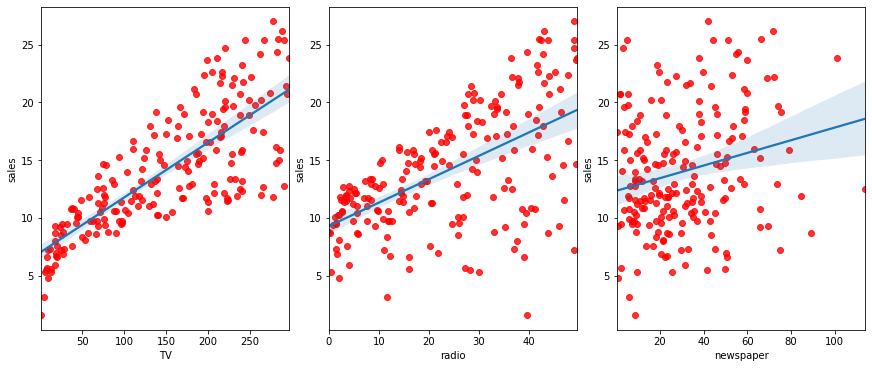

In [109]:
_, axes = plt.subplots(1, 3, figsize=(12, 5), constrained_layout=True)

sns.regplot(data=advertising,
            x='TV',
            y='sales',
            scatter_kws={'color': 'red'},
            ax=axes[0])
sns.regplot(data=advertising,
            x='radio',
            y='sales',
            scatter_kws={'color': 'red'},
            ax=axes[1])
sns.regplot(data=advertising,
            x='newspaper',
            y='sales',
            scatter_kws={'color': 'red'},
            ax=axes[2])

More generally, suppose that we observe a quantitative response $Y$ and $p$ different predictors, $X_{1}, X_{2}, \ldots, X_{p} $.

We assume that there is some relationship between $Y$ and $X=\left(X_{1}, X_{2}, \ldots, X_{p}\right)$, which can be written in the very general form:


$$
Y=f(X)+\epsilon
$$


The symbol $f$ represents the systematic information that $X$ provides about $Y$. Statistical learning refers to a set of approaches for estimating $f$.

### FIGURE 2.2.

In [5]:
# income = pd.read_csv('http://faculty.marshall.usc.edu/gareth-james/ISL/Income1.csv')
income = pd.read_csv('../data//Income1.csv', index_col=0)
income.head()

,Education,Income
1,10.000000,26.658839
2,10.401338,27.306435
3,10.842809,22.132410
4,11.244147,21.169841
5,11.645485,15.192634


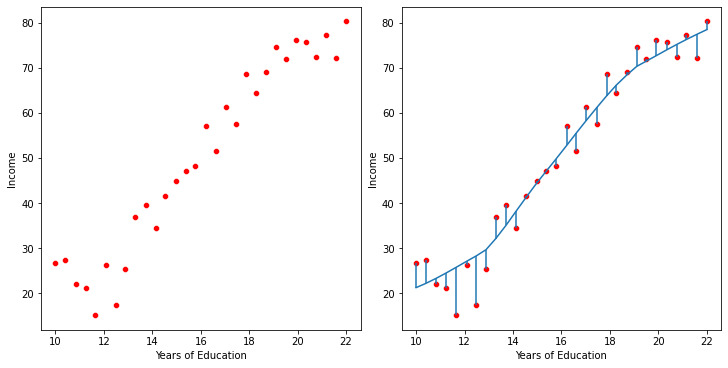

In [108]:
_, axes = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)


for i in range(2):

    g = sns.scatterplot(data=income,
                         x='Education',
                         y='Income',
                         color='red',
                         ax=axes[i])
    g.set(xlabel='Years of Education')


lowess = sm.nonparametric.lowess(endog=income.Income,
                                 exog=income.Education,
                                 frac=0.5)

axes[1].plot(lowess[:, 0], lowess[:, 1])

axes[1].vlines(x=lowess[:, 0],
               ymin=np.fmin(income.Income, lowess[:, 1]),
               ymax=np.fmax(income.Income, lowess[:, 1]))

## Why estimate $f$?

Either for **prediction** or **inference**.

### Prediction 

The set of inputs X are readily available, but the output Y cannot easily be obtained. We wish to predict what Y will be given a set of inputs X

$$
\hat{Y}=\hat{f}(X)
$$


The accuracy of the prediction depends on two quantities - **the reducible and the irreducible error**. The estimate $\hat{f}(X)$
will not be a perfect estimate for the **true** $f(X)$

We can reduce the error by using better statistical learning techniques.
However the variability of $ϵ$ also affects the accuracy of the predictions. This is the irreducible error.

Consider a given estimate $\hat{f}$ and a set of predictors $X$, which yields the prediction $\hat{Y}=\hat{f}(X)$. Assume for a moment that both $\hat{f}$ and $X$ are fixed. Then, it is easy to show that

$$
\begin{aligned}
E(Y-\hat{Y})^{2} &=E[f(X)+\epsilon-\hat{f}(X)]^{2} \\
&=\underbrace{[f(X)-\hat{f}(X)]^{2}}_{\text {Reducible }}+\underbrace{\operatorname{Var}(\epsilon)}_{\text {Irreducible }}
\end{aligned}
$$

where $E(Y-\hat{Y})^{2}$ represents the average, or expected value, of the squared difference between the predicted and actual value of $Y$, and $\operatorname{Var}(\epsilon)$ represents the variance associated with the error term $\epsilon$.



### Inference

We are often interested in the way that Y
is affected by changes in X. We need to estimate $f(X)$, but we don’t want to predict Y. We instead want to understand the relationship betrween X and Y.

### FIGURE 2.3.

**3D plotting is never an easy job**

In [88]:
# income = pd.read_csv('http://faculty.marshall.usc.edu/gareth-james/ISL/Income2.csv')
income2 = pd.read_csv('../data//Income2.csv', index_col=0)
income2.head()

,Education,Seniority,Income
1,21.586207,113.103448,99.917173
2,18.275862,119.310345,92.579135
3,12.068966,100.689655,34.678727
4,17.034483,187.586207,78.702806
5,19.931034,20.000000,68.009922


In [89]:
formula = "Income ~ Education + Seniority + Education*Seniority"
result = smf.ols(formula=formula, data=income2).fit()
print(result.params)

Intercept             -57.176806
Education               6.345990
Seniority               0.255030
Education:Seniority    -0.005072
dtype: float64


In [90]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     126.1
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           1.31e-15
Time:                        21:28:05   Log-Likelihood:                -99.792
No. Observations:                  30   AIC:                             207.6
Df Residuals:                      26   BIC:                             213.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -57.1768     10.753     -5.317      0.000     -79.279     -35.074
Education               6.3460      0.670      9.475      0.000       4.969       7.723
Seniority               0.2550      0.106      2.406      0.024       0.037       0.473
Education:Seniority    -0.0051      0.006     -0.797      0.433      -0.018       0.008
==============================================================================
Omnibus:                        3.209   Durbin-Watson:                   2.137
Prob(Omnibus):                  0.201   Jarque-Bera (JB):                2.710
Skew:                           0.725   Prob(JB):                        0.258
Kurtosis:                       2.746   Cond. No.                     1.54e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### FIGURE 2.4.

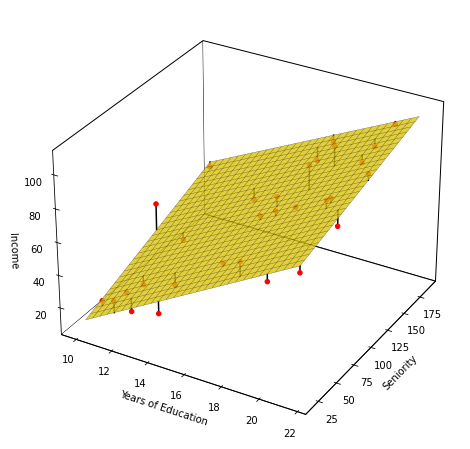

In [91]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

xx = income2['Education']
yy = income2['Seniority']
zz = income2['Income']

def generate_mesh2d(array):
     
    new_array = []
    
    for i in range(len(array)):
        
        # 如下生成meshgrid数据，并保证xx和yy一定出现在meshgrid中
        x_space = (array[i].max() - array[i].min()) / 30
        xx_sort = np.sort(array[i])
        
        n = len(array[i])
        XX = [array[i].min()]
        
        for i in range(n - 1):
            space = xx_sort[i + 1] - xx_sort[i]
            # 加判断，< 1 时，区间 * 2
            n_interval = int(space // x_space)
            seq = list(np.linspace(xx_sort[i], xx_sort[i + 1], n_interval + 1))
            XX.extend(seq[1:])

        XX = np.array(XX)
        new_array.append(XX)
        
    return new_array

XX, YY = generate_mesh2d([xx, yy])
X, Y = np.meshgrid(XX, YY)

exog = pd.DataFrame({'Education': X.ravel(), 'Seniority': Y.ravel()})
Z = np.array(result.predict(exog=exog)).reshape(X.shape)

ax.plot_surface(X=X, Y=Y, Z=Z, rcount=1, ccount=1, color='#F2D711', alpha=0.8)
ax.plot_wireframe(X=X,
                  Y=Y,
                  Z=Z,
                  rstride=1,
                  cstride=1,
                  lw=0.2,
                  color='k',
                  alpha=1)

ax.scatter3D(xs=xx, ys=yy, zs=zz, color='r', alpha=1)

# 画误差线
for value1, value2, value3 in zip(xx, yy, zz):
    idxx = np.argmin(np.abs(XX - value1))
    idxy = np.argmin(np.abs(YY - value2))
    X0 = XX[idxx]
    Y0 = YY[idxy]
    Z0 = Z[idxy, idxx]
    ax.plot3D((value1, X0), (value2, Y0), (value3, Z0), 'black')

ax.zaxis._axinfo['juggled'] = (1, 2, 0)
ax.set_xlabel('Years of Education')
ax.set_ylabel('Seniority')
ax.set_zlabel('Income')
ax.xaxis.pane.set_alpha(1)
ax.yaxis.pane.set_alpha(1)
ax.zaxis.pane.set_alpha(1)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')
ax.xaxis.pane.set_fc('white')
ax.yaxis.pane.set_fc('white')
ax.zaxis.pane.set_fc('white')
ax.grid(0)
plt.show()

### FIGURE 2.5.

In [ ]:
# 3d plot

### FIGURE 2.6.

In [ ]:
# 3d plot

### FIGURE 2.7.

<img src=https://marcfbellemare.com/wordpress/wp-content/uploads/2019/01/JamesFigure.jpg>

### FIGURE 2.8.

## 2.2 Assessing Model Accuracy

## 2.3 Lab: Introduction to Python

Python uses functions to perform operations. To run a function called `funcname`, we type `funcname(input1, input2)`, where the inputs (or _arguments_) `input1` and `input2` tell Python how to run the function. A function can have any number of inputs. For example, to create a vector of numbers, we use the function `np.array()` from the module `NumPy`. To do this, we need to pass a `list` as an argument to the function, lists are a built-in data type in Python. Here we assume you are already familiar with basic Python objects.

In [11]:
# Define a new vector x
x = np.array([1, 6, 2])
x

array([1, 6, 2])

Typing the `help(funcname)` will cause Jupyter to pop up a help panel with additional information about the function `funcname`.

In [12]:
# help(np.array)

We now make a second vector `y`.

In [13]:
y = np.array([1, 4, 3])

We can tell Python to add two sets of numbers together. It will then add the first number from `x` to the first number from `y`, and so on. However, `x` and `y` should be the same length. We can check their length using the `len()` function.

In [14]:
len(x)

3

In [15]:
len(y)

3

In [16]:
x + y

array([ 2, 10,  5])

The "magic" `%whos` command allows us to look at a list of all the objects, such as data and functions, that we have saved so far.

In [17]:
%whos

Variable          Type                        Data/Info
-------------------------------------------------------
X                 ndarray                     28x29: 812 elems, type `float64`, 6496 bytes
X0                float64                     17.0344827586207
XX                ndarray                     29: 29 elems, type `float64`, 232 bytes
Y                 ndarray                     28x29: 812 elems, type `float64`, 6496 bytes
Y0                float64                     106.896551724138
YY                ndarray                     28: 28 elems, type `float64`, 224 bytes
Z                 ndarray                     28x29: 812 elems, type `float64`, 6496 bytes
Z0                float64                     68.9506564687634
advertising       DataFrame                           TV  radio  newspa<...>n\n[200 rows x 4 columns]
ax                Axes3DSubplot               Axes3DSubplot(0.135,0.125;0.755x0.755)
axes              ndarray                     2: 2 elems, type `obj

The command `del` can be used to delete any that we don't want.

In [18]:
# del x

In [19]:
%whos

Variable          Type                        Data/Info
-------------------------------------------------------
X                 ndarray                     28x29: 812 elems, type `float64`, 6496 bytes
X0                float64                     17.0344827586207
XX                ndarray                     29: 29 elems, type `float64`, 232 bytes
Y                 ndarray                     28x29: 812 elems, type `float64`, 6496 bytes
Y0                float64                     106.896551724138
YY                ndarray                     28: 28 elems, type `float64`, 224 bytes
Z                 ndarray                     28x29: 812 elems, type `float64`, 6496 bytes
Z0                float64                     68.9506564687634
advertising       DataFrame                           TV  radio  newspa<...>n\n[200 rows x 4 columns]
ax                Axes3DSubplot               Axes3DSubplot(0.135,0.125;0.755x0.755)
axes              ndarray                     2: 2 elems, type `obj

It's also possible to remove all objects at once.

In [20]:
# %reset

In [21]:
# %whos

The `np.matrix()` function can be used to create a matrix of numbers. Before we use the `np.matrix()` function we can learn more about it.

In [22]:
# help(np.matrix)

The help reveals that the `matrix()` function can take a number of inputs, but for now we focus on how to build a simple matrix. To build a matrix, we can input a list of lists as a parameter. Each list is a row.

In [23]:
x = np.matrix([[1, 3], [2, 4]])
x

matrix([[1, 3],
        [2, 4]])

If `data` is a string, it is interpreted as a matrix with commas or spaces separating columns, and semicolons separating rows.

In [24]:
x = np.matrix('1, 3; 2, 4')
x

matrix([[1, 3],
        [2, 4]])

The `np.sqrt()` function return the square root of each element of a vector or a matrix. The function `np.power(x, 2)` raises each element of `x` to the power of 2; any powers are possible, including fractional or negative powers.

In [25]:
np.sqrt(x)

matrix([[1.        , 1.73205081],
        [1.41421356, 2.        ]])

In [26]:
np.power(x, 2)

matrix([[ 1,  9],
        [ 4, 16]])

In [27]:
from numpy import random

The `random.normal()` function generates a vector of random normal variables, with third argument `size` the sample size. Each time we call this function, we will get a different answer. Here we create two correlated sets of numbers, `x` and `y`, and use the `np.corrcoef()` function to compute the correlation matrix between them.

In [28]:
x = random.normal(size=50)
y = x + random.normal(size=50, loc=50, scale=.1)
np.corrcoef(x, y)

array([[1.        , 0.99703289],
       [0.99703289, 1.        ]])

By default, `random.normal` creates random variables from standard normal distribution with mean of 0 and standard deviation of 1. However, the mean and standard deviation can be altered using the `loc` and `scale` arguments, as illustrated above. Sometimes we want our code to reproduce the exact same set of random numbers; we can use the `random.seed()` function to do this. The `random.seed()` function takes an (arbitrary) integer argument.

In [29]:
random.seed(1303)
random.normal(size=50)

array([-0.03425693,  0.06035959,  0.45511859, -0.36593175, -1.6773304 ,
        0.5910023 ,  0.41090101,  0.46972388, -1.50462476, -0.70082238,
        1.43196963,  0.35474484,  1.67574682,  1.62741373,  0.27015354,
        0.15248539,  0.11593596,  0.89272237, -2.16627436,  0.26787192,
        0.36658207,  2.72335408,  0.44060293,  0.36036757,  0.38119264,
       -0.27845602,  1.73458476, -1.48138111, -0.47556927, -0.1932596 ,
        0.68115816, -0.05143463, -0.59151688,  0.02292374, -0.12259196,
        0.50633508,  0.63181139, -0.2443932 ,  0.39847385, -1.2716468 ,
        0.43167303, -1.36491646,  0.91004701,  0.65707308, -0.080445  ,
       -1.12057881, -1.31479423,  0.26394714, -0.59459381, -0.07624482])

We use `random.seed()` throughout the labs whenever we perform calculations involving random quantities in order to obtain reproducible results.

The `np.mean()` and `np.var()` functions can be used to compute the mean and variance of a vector of numbers. Applying `np.sqrt()` to the output of `np.var()` will give the standard deviation (or we can use `np.std()`).

In [30]:
random.seed(3)
y = random.normal(size=100)
np.mean(y)

-0.10863707440606224

In [31]:
np.var(y)

1.132081888283007

In [32]:
np.std(y)

1.0639933685333791

### Graphics

The `plt.plot` function is the primary way to plot data in Python. For instance, `plt.plot(x, y, 'o')` produces a scatterplot of the numbers in `x` versus the numbers in `y`. There are many additional options that can be passed in to the `plt.plot()` function, and many other functions that alter the appearance of the plot. For example, the `plt.xlabel()` function will result on a label in the x-axis. A format string consists of a part for color, marker and line: `fmt = '[marker][line][color]'`

In [33]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Plot of X vs Y')

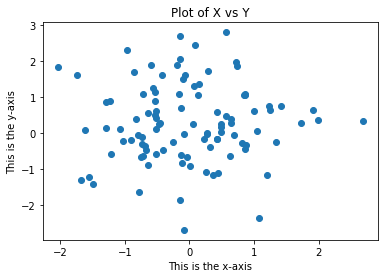

In [34]:
x = random.normal(size=100)
y = random.normal(size=100)
plt.scatter(x, y)
plt.xlabel('This is the x-axis')
plt.ylabel('This is the y-axis')
plt.title('Plot of X vs Y')

We will often want to save the output of a Python plot. We do this with the `plt.savefig()` function. We can choose the type of format to output by changing the extension of the file name. For instance, to create a pdf, we use `plt.savefig('output.pdf')`, and to create a jpeg, we use `plt.savefig('output.jpeg')`.

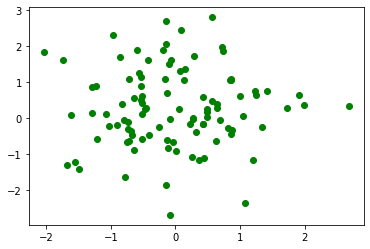

In [35]:
plt.scatter(x, y, c='g')
# plt.savefig('Figure.pdf')

The function `np.arange` can be used to create a sequence of numbers. For instance, `np.arange(a, b)` makes a vector of integers between `a` and `b`, excluding `b`. Another funciton `np.linspace(a, b, n)` makes a sequence of `n` numbers that are equally spaced between `a` and `b`.

In [36]:
np.arange(1, 11)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [37]:
np.arange(1, 11, 2)

array([1, 3, 5, 7, 9])

In [38]:
x = np.linspace(-np.pi, np.pi, 50)
x

array([-3.14159265, -3.01336438, -2.88513611, -2.75690784, -2.62867957,
       -2.5004513 , -2.37222302, -2.24399475, -2.11576648, -1.98753821,
       -1.85930994, -1.73108167, -1.60285339, -1.47462512, -1.34639685,
       -1.21816858, -1.08994031, -0.96171204, -0.83348377, -0.70525549,
       -0.57702722, -0.44879895, -0.32057068, -0.19234241, -0.06411414,
        0.06411414,  0.19234241,  0.32057068,  0.44879895,  0.57702722,
        0.70525549,  0.83348377,  0.96171204,  1.08994031,  1.21816858,
        1.34639685,  1.47462512,  1.60285339,  1.73108167,  1.85930994,
        1.98753821,  2.11576648,  2.24399475,  2.37222302,  2.5004513 ,
        2.62867957,  2.75690784,  2.88513611,  3.01336438,  3.14159265])

We will now create some more sophisticated plots. For instance, the `plt.contour()` function produces a contour plot in order to represent three-dimensional data; it is like a topographical map. It takes three arguments:
1. A vector of the `x` values (the first dimension),
2. A vector of the `y` values (the second dimension), and
3. A matrix of the `z` values (the third dimensions) for each pair of (`x`, `y`) coordintes.

As with the `plt.plot()` function, there are many other inputs that can be used to fine-tune the output of the `plt.contour()` function. To learn more about these, take a look at the help file by typing `?plt.contour`.

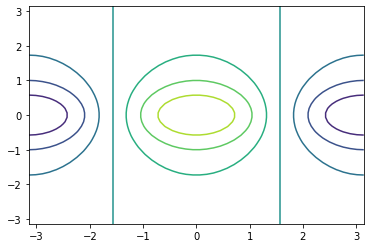

In [39]:
y = x
f = np.matrix([[np.cos(j) / (1 + i**2) for j in y] for i in x])
_ = plt.contour(x, y, f)

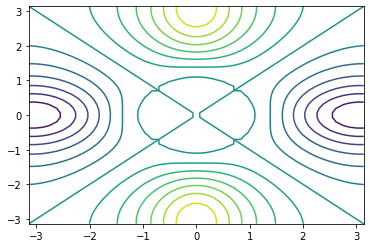

In [40]:
fa = (f - f.T) / 2
_ = plt.contour(x, y, fa, 15)

In [41]:
np.shape(fa)

(50, 50)

The `plt.contourf()` function works the same way as `plt.contour()`, except that it produces a color-coded plot whose colors depend on the `z` value. This is known as heatmap, and is sometimes used to plot temperature in weather forecasts. Alternatively, `plt.` can be used to produce a three-dimensional plot. 

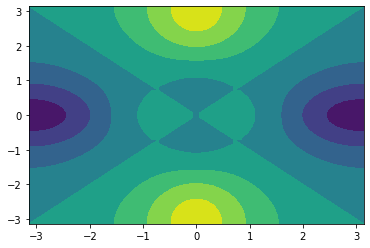

In [42]:
_ = plt.contourf(x, y, fa)

The function `axes3d` create 3D plots, where `elev` and `azim` values control the angles to view the plots.

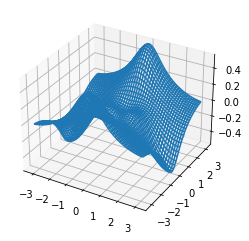

In [43]:
X, Y = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=30)
ax.plot_wireframe(X, Y, fa)

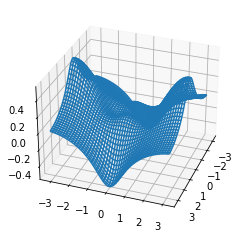

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=30, azim=20)
ax.plot_wireframe(X, Y, fa)

### Indexing Data

We often wish to examine part of a set of data. Suppose that our data is stored in the matrix `A`.

In [45]:
A = np.arange(1, 17).reshape(4, 4)
A = A.T
A

array([[ 1,  5,  9, 13],
       [ 2,  6, 10, 14],
       [ 3,  7, 11, 15],
       [ 4,  8, 12, 16]])

Then, type

In [46]:
A[1, 2]

10

will select the element corresponding to the second row and the third column. The first number after the open-bracket symbol [ always refers to the row, and the second number always refers to the column.

In [47]:
A[[0, 2]][:, [1, 3]]

array([[ 5, 13],
       [ 7, 15]])

In [48]:
A[0:3, 1:4]

array([[ 5,  9, 13],
       [ 6, 10, 14],
       [ 7, 11, 15]])

In [49]:
A[0:2, :]

array([[ 1,  5,  9, 13],
       [ 2,  6, 10, 14]])

In [50]:
A[:, 0:2]

array([[1, 5],
       [2, 6],
       [3, 7],
       [4, 8]])

The last two examples include either `:` for the columns or `:` for the rows. These indicate that Python should include all columns or all rows, respectively. Python treats a single row or column of a matrix as a vector.

In [51]:
A[0,]

array([ 1,  5,  9, 13])

The wave symbol `~` in indeces tells Python to exclude the rows or columns that you specifiy.

In [52]:
A[[~2, ~0]]

array([[ 2,  6, 10, 14],
       [ 4,  8, 12, 16]])

In [53]:
A[[~2, ~0]][:, [1]]

array([[6],
       [8]])

In [54]:
A

array([[ 1,  5,  9, 13],
       [ 2,  6, 10, 14],
       [ 3,  7, 11, 15],
       [ 4,  8, 12, 16]])

The `np.shape()` function outputs the number of rows followed by the number of columns of a given matrix

In [55]:
np.shape(A)

(4, 4)

### Loading Data

For most analyses, the first step involves importing a data set into Python. The `pd.read_table()` function is one of the primary ways to do this. The help file contains details about how to use this function. We can export data using the `.to_{format}` method.

Before attempting to load a data set, we must make sure that Python knows to search for the data in the proper directory. We can do this by specifying the path in the argument of the `pd.read_table()` function. We begin by loading in the Auto data set. The following command will load the `Auto.csv` file into Python and store it as an object called `Auto`, in a format referred to as a `data frame`.

In [56]:
import pandas as pd

In [57]:
# auto = pd.read_csv('http://faculty.marshall.usc.edu/gareth-james/ISL/Auto.data')
auto = pd.read_csv('../data/Auto.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [58]:
auto.shape

(397, 9)

Note that `Auto.csv` is simply a text file, which you could alternatively open on your computer using a standard text editor. It is often a good idea to view a data set using a text editor or other software such as Excel before loading it into Python.

The data set also includes a number of missing observations, indicated by a question mark '?'. Missing values are a common occurrence in real data sets.

In [59]:
auto.values

array([[18.0, 8, 307.0, ..., 70, 1, 'chevrolet chevelle malibu'],
       [15.0, 8, 350.0, ..., 70, 1, 'buick skylark 320'],
       [18.0, 8, 318.0, ..., 70, 1, 'plymouth satellite'],
       ...,
       [32.0, 4, 135.0, ..., 82, 1, 'dodge rampage'],
       [28.0, 4, 120.0, ..., 82, 1, 'ford ranger'],
       [31.0, 4, 119.0, ..., 82, 1, 'chevy s-10']], dtype=object)

In [60]:
auto.query("horsepower=='?'")

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i


One option is to replace this values with `NaN`.

In [61]:
auto = auto.replace('?', np.NaN)

The `shape` method tells us that the data has 397 observations, or rows, and nine variables, or columns. There are various ways to deal with the missing data. In this case, only five of the rows contain missing observations, and so we choose to use the `dropna` method to simply remove these rows.

In [62]:
auto = auto.dropna()

In [63]:
auto.shape

(392, 9)

Once the data are loaded correctly, we can use the method `columns` to check the variable names.

In [64]:
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

### Additional Graphical and Numerical Summaries

We can use the plot() function to produce scatterplots of the quantitative variables. However, simply typing the variable names will produce an error message, because Python does not know to look in the Auto data set for those variables.

To refer to a variable, we must type the data set and the variable name joined with a `.` symbol.

In [65]:
import seaborn as sns

<AxesSubplot:xlabel='cylinders', ylabel='mpg'>

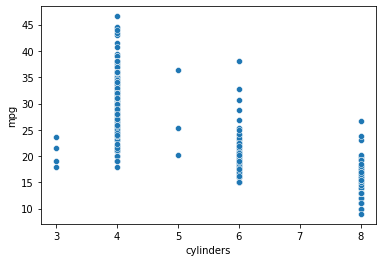

In [66]:
sns.scatterplot(data=auto, x='cylinders', y='mpg')

In [67]:
auto.cylinders = auto.cylinders.astype('category')

<AxesSubplot:xlabel='cylinders', ylabel='mpg'>

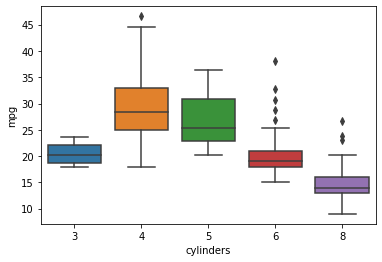

In [68]:
sns.boxplot(data=auto, x='cylinders', y='mpg')

<AxesSubplot:xlabel='mpg', ylabel='Count'>

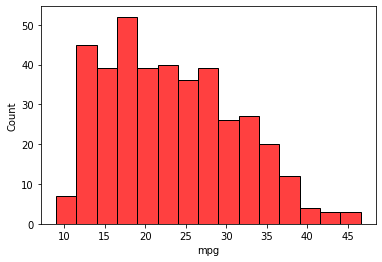

In [69]:
sns.histplot(data=auto, x='mpg', bins=15, color='red')

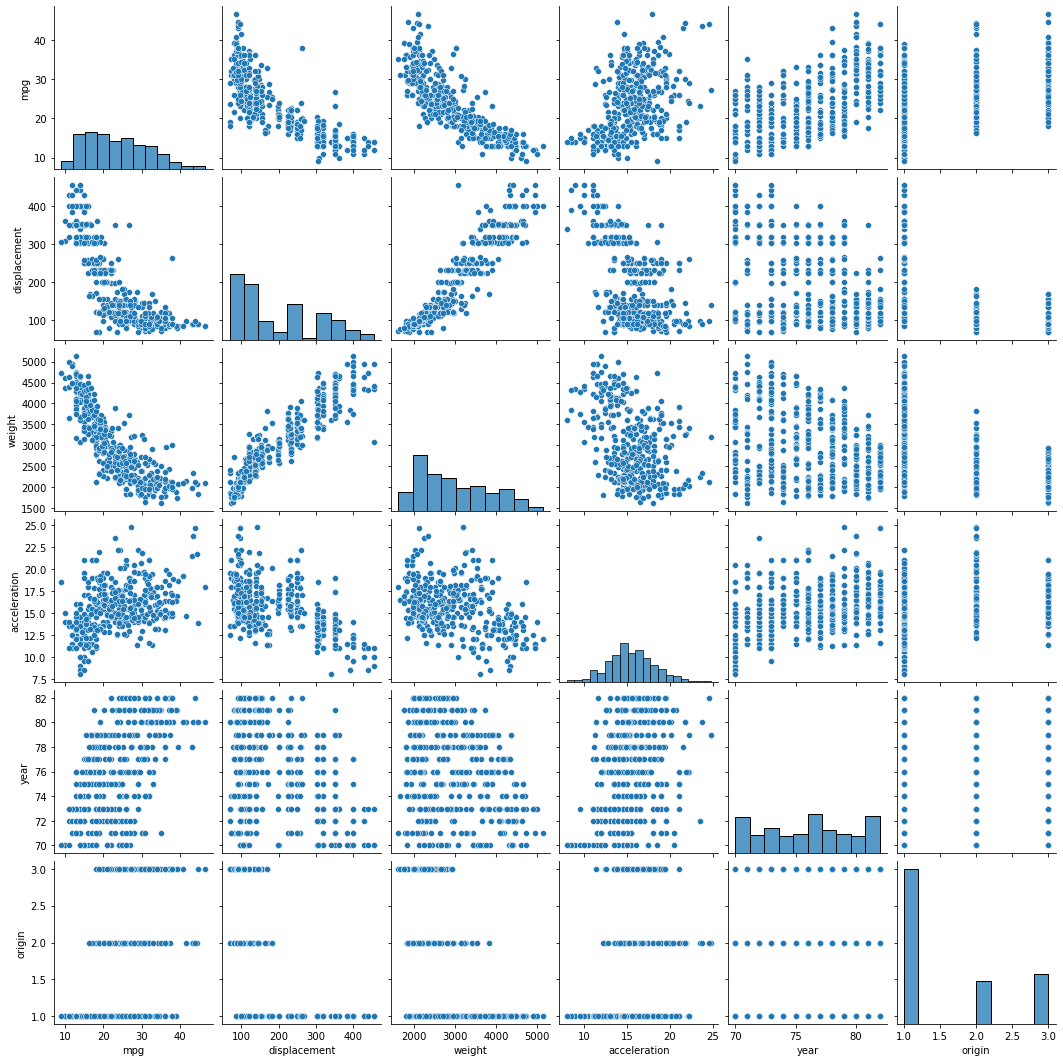

In [70]:
sns.pairplot(auto)

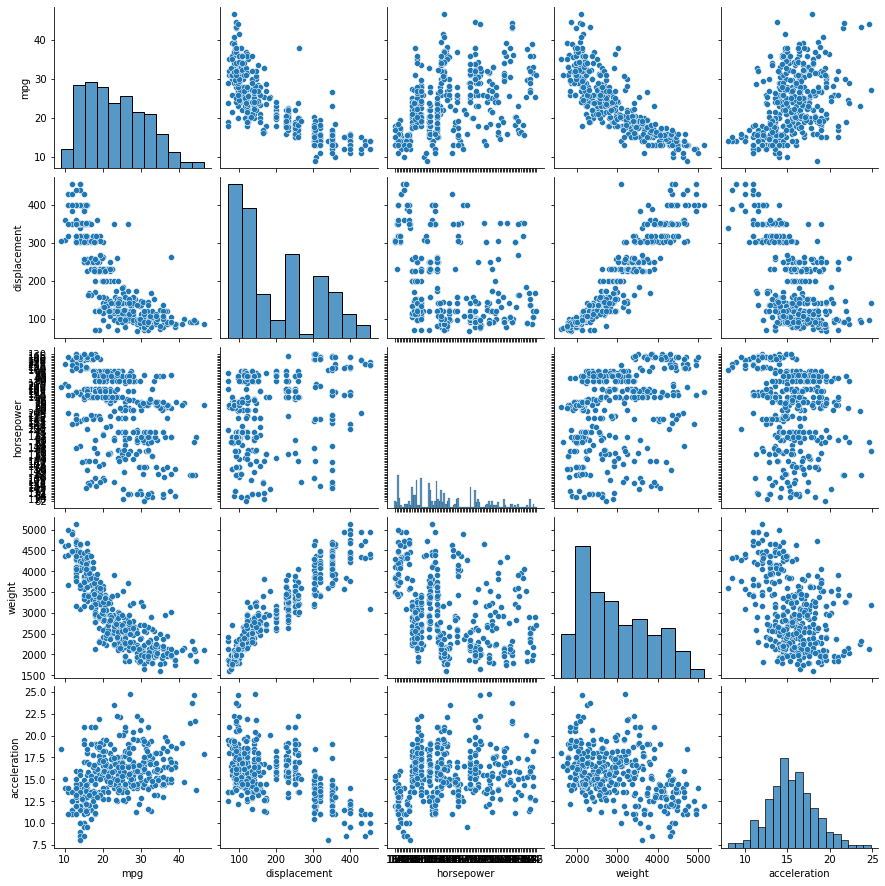

In [71]:
var_list = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']

sns.pairplot(data=auto, vars=var_list)

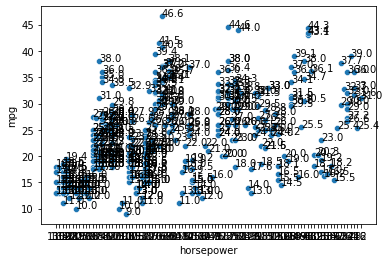

In [72]:
g = sns.scatterplot(data=auto, x='horsepower', y='mpg')

for i, txt in enumerate(auto.mpg):
    plt.annotate(txt, (auto.horsepower.iat[i], auto.mpg.iat[i]))

The `describe()` method produces a numerical summary of each variable in a particular data set.

In [73]:
auto.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
count,392.000000,392.0,392.000000,392,392.000000,392.000000,392.000000,392.000000,392
unique,NaN,5.0,NaN,93,NaN,NaN,NaN,NaN,301
top,NaN,4.0,NaN,150,NaN,NaN,NaN,NaN,amc matador
freq,NaN,199.0,NaN,22,NaN,NaN,NaN,NaN,5
mean,23.445918,NaN,194.411990,NaN,2977.584184,15.541327,75.979592,1.576531,NaN
std,7.805007,NaN,104.644004,NaN,849.402560,2.758864,3.683737,0.805518,NaN
min,9.000000,NaN,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.000000,NaN,105.000000,NaN,2225.250000,13.775000,73.000000,1.000000,NaN
50%,22.750000,NaN,151.000000,NaN,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,NaN,275.750000,NaN,3614.750000,17.025000,79.000000,2.000000,NaN


In [74]:
auto.name.describe()

count             392
unique            301
top       amc matador
freq                5
Name: name, dtype: object

In [75]:
auto.mpg.describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

## 2.4 Exercises

### Conceptual

#### 1. 

For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

(a) 
Better. As the level of flexibility increases, the curve fit the observed data more closely and a better fit would be obtained with the large sample size.

(b)
Worse. The flexible statistical learning method would overfit the data with extremely large number of predictors p and small number of observations n.

(c)
Better. If the relationship between the predictors and response is highly non-linear, an inflexible statistical learning method would lead to high training MSE, while a flexible method may fit the data better.

(d)
Worse. A flexible statistical learning method would fit the noise in the error terms and increase variance.

#### 2. 

Explain whether each scenario is a classification or regression problem, and indicate whether we are most interested in inference or prediction. Finally, provide n and p.

(a)
Regression problem. We are interested in inference, say, how the CEO salary is affected as profit, number of employees and industry change.
n - 500 firms in the US
p - profit, number of employees, industry

(b)
Classification problem. We are interested in prediction. To predict a new product and will be a success or a failure.
n - 20 similar products previously launched
p - price charged, marketing budget, comp. price, ten other variables

(c)
Regression problem. We are interested in inference, that is to say, we want to know how the % change in the US dollar in relation to the weekly changes in the world stock markets.
n - 52 weeks of 2012 weekly data
p - % change in US market, % change in British market, % change in German market

#### 3. 

We now revisit the bias-variance decomposition.

(a)

(b)
all 5 lines >= 0

i. (squared) bias - decreases monotonically because increases in flexibility
yield a closer fit

ii. variance - increases monotonically because increases in flexibility yield
overfit

iii. training error - decreases monotonically because increases in flexibility
yield a closer fit

iv. test error - concave up curve because increase in flexibility yields a closer
fit before it overfits

v. Bayes (irreducible) error - defines the lower limit, the test error is bounded 
below by the irreducible error due to variance in the error (epsilon) in the output 
values (0 <= value). When the training error is lower than the irreducible error,
overfitting has taken place.
The Bayes error rate is defined for classification problems and is determined by 
the ratio of data points which lie at the 'wrong' side of the decision boundary, 
(0 <= value < 1).

#### 4. 

You will now think of some real-life applications for statistical learning.

#### 5. 

What are the advantages and disadvantages of a very flexible (versus a less flexible) approach for regression or classification? Under what circumstances might a more flexible approach be preferred to a less flexible approach? When might a less flexible approach be preferred?

The advantages for a very flexible approach for regression or classification are obtaining a better fit for non-linear models, decreasing bias.

The disadvantages for a very flexible approach for regression or classification are requires estimating a greater number of parameters, follow the noise too closely (overfit), increasing variance.

A more flexible approach would be preferred to a less flexible approach when we are interested in prediction and not the interpretability of the results.

A less flexible approach would be preferred to a more flexible approach when we are interested in inference and the interpretability of the results.

#### 6. 

Describe the differences between a parametric and a non-parametric statistical learning approach. What are the advantages of a parametric approach to regression or classification (as opposed to a non-parametric approach)? What are its disadvantages?

A parametric approach reduces the problem of estimating f down to one of estimating a set of parameters because it assumes a form for f.

A non-parametric approach does not assume a functional form for f and so requires a very large number of observations to accurately estimate f.

The advantages of a parametric approach to regression or classification are the simplifying of modeling f to a few parameters and not as many observations are
required compared to a non-parametric approach.

The disadvantages of a parametric approach to regression or classification are a potential to inaccurately estimate f if the form of f assumed is wrong or
to overfit the observations if more flexible models are used.

#### 7. 

The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.

(a)

In [76]:
obs0 = np.array([0, 0, 0])
obs1 = np.array([0, 3, 0])
obs2 = np.array([2, 0, 0])
obs3 = np.array([0, 1, 3])
obs4 = np.array([0, 1, 2])
obs5 = np.array([-1, 0, 1])
obs6 = np.array([1, 1, 1])

obs = [obs1, obs2, obs3, obs4, obs5, obs6]
dist = {}

for i in range(6):
    dist['obs' + str(i + 1)] = np.sqrt(np.sum((obs[i] - obs0)**2))
    print('obs' + str(i + 1) + ':', dist['obs' + str(i + 1)])

obs1: 3.0
obs2: 2.0
obs3: 3.1622776601683795
obs4: 2.23606797749979
obs5: 1.4142135623730951
obs6: 1.7320508075688772


(b), (c)

In [77]:
sorted(dist.items(), key=lambda item: item[1])

[('obs5', 1.4142135623730951),
 ('obs6', 1.7320508075688772),
 ('obs2', 2.0),
 ('obs4', 2.23606797749979),
 ('obs1', 3.0),
 ('obs3', 3.1622776601683795)]

prediction = Green;

prediction = Red;

(d)

Small. A small K would be flexible for a non-linear decision boundary,
whereas a large K would try to fit a more linear boundary because it takes more
points into consideration.

### Applied

#### 8. College dataset

(a)

In [78]:
import janitor as jn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [79]:
# college = pd.read_csv('http://faculty.marshall.usc.edu/gareth-james/ISL/College.csv')
college = pd.read_csv('../data//college.csv')
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


(b)

In [80]:
college = college.rename_column('Unnamed: 0', 'College')
college.head()

,College,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


(c) i

In [81]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


(c) ii

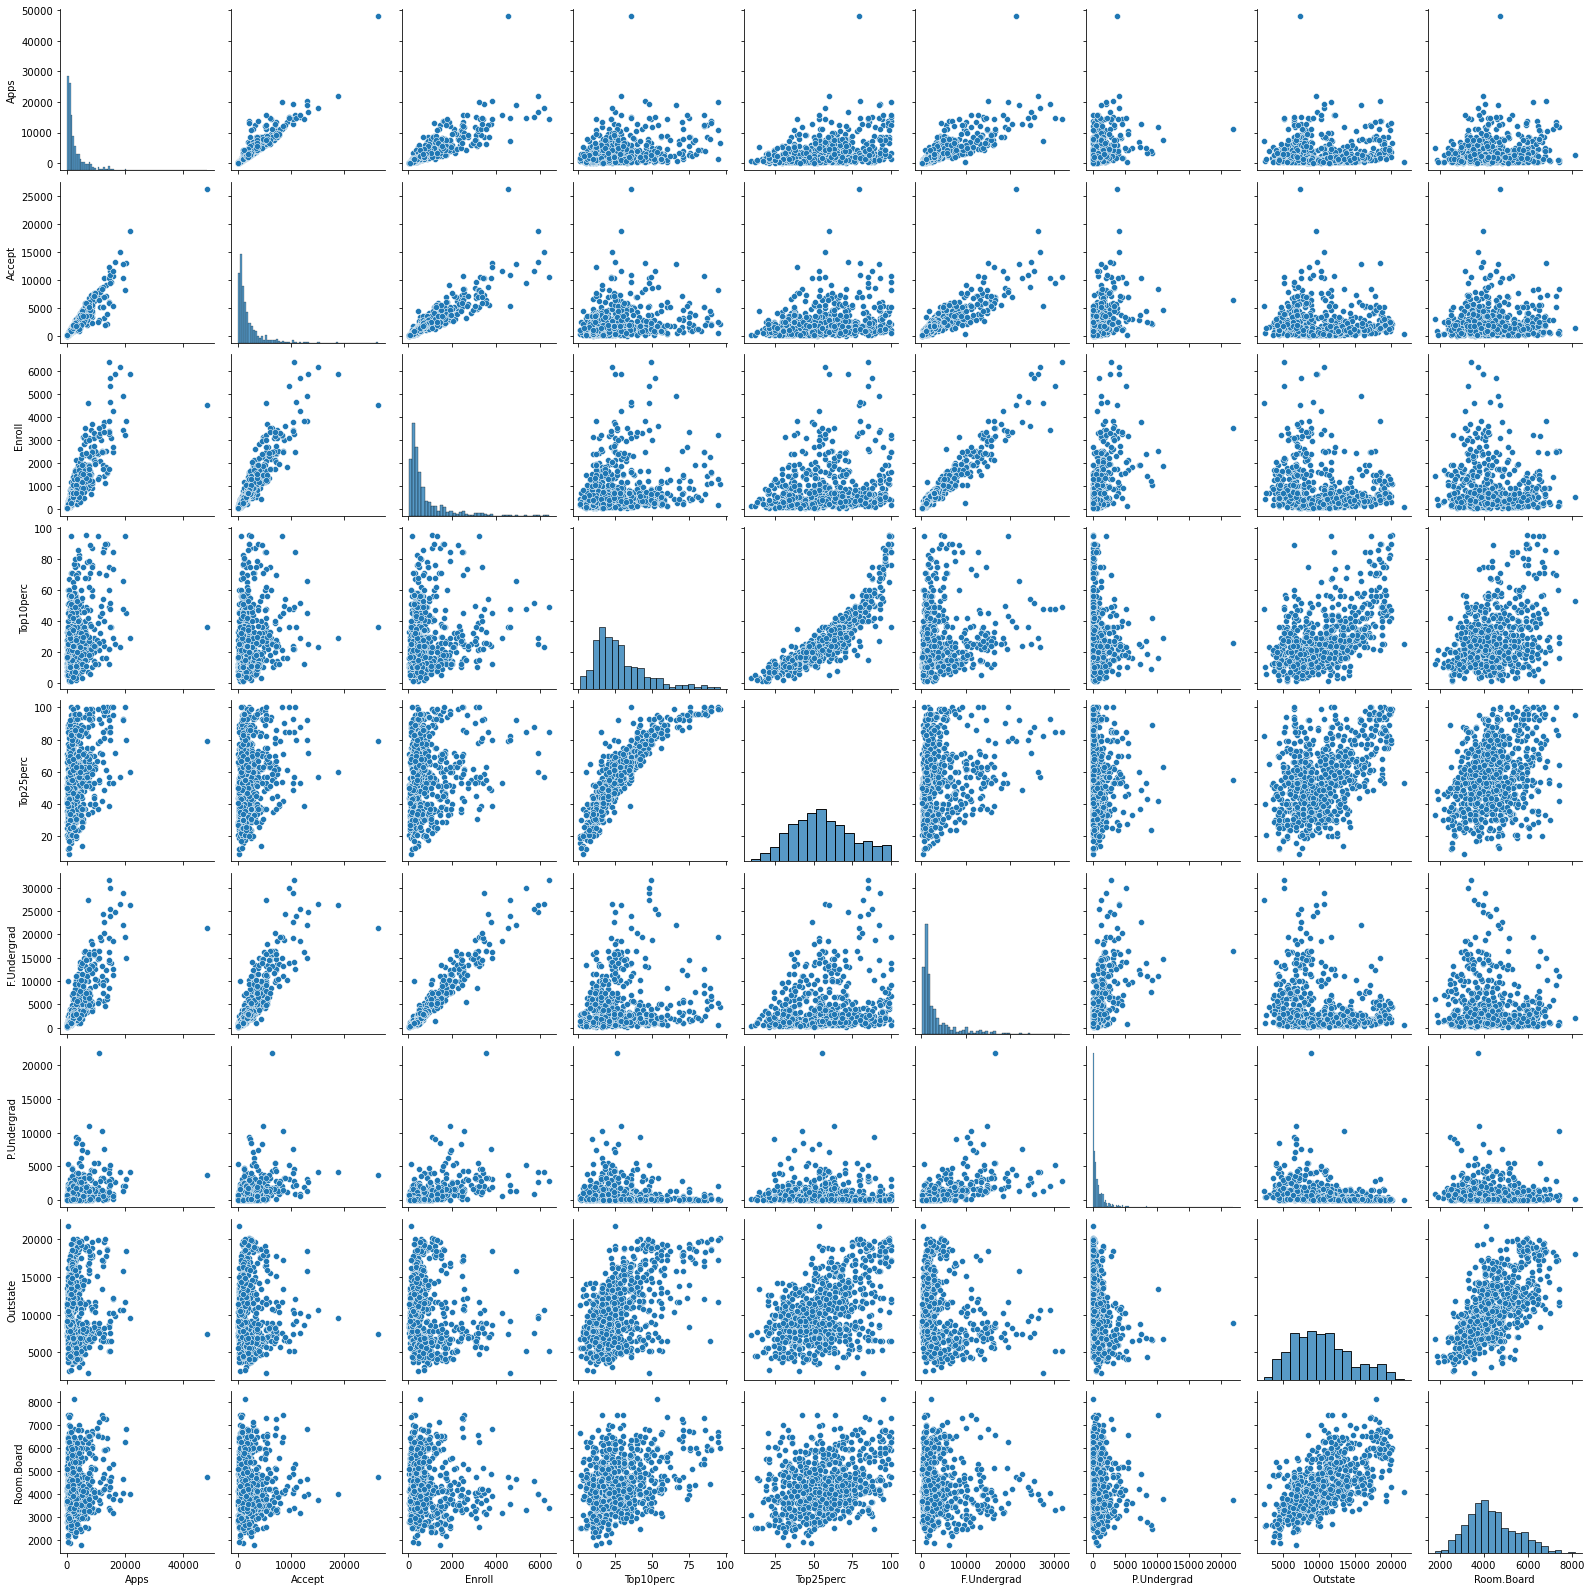

In [82]:
sns.pairplot(college.iloc[:, 1:11])

(c) iii

<AxesSubplot:xlabel='Private', ylabel='Outstate'>

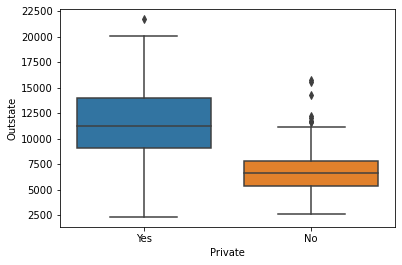

In [83]:
sns.boxplot(data=college, x='Private', y='Outstate')

(c) iv

In [84]:
college.add_column('Elite', value=(college.Top10perc > 50));

In [85]:
college.Elite.astype('bool')

AttributeError: 'DataFrame' object has no attribute 'Elite'

In [ ]:
sns.boxplot(college.Elite, college.Outstate);

(c) v

In [ ]:
# Normalization
def norm(df):
    return (df - df.mean()) / (df.std())


features = 13
college_norm = norm(college.iloc[:, 2:features + 1])
college_norm.head()

`pandas.melt()` Unpivot a DataFrame from wide format to long format, optionally leaving identifier variables set.

In [ ]:
college_melt = college_norm.pivot_longer(values_to='vals')
college_melt.head()

In [ ]:
sns.displot(data=college_melt,
            x='vals',
            col='variable',
            col_wrap=4,
            kde=True,
            stat="density",
            common_norm=False)

In [ ]:
g = sns.FacetGrid(college_melt, col='variable', col_wrap=4)
g.map(sns.distplot, 'vals')
g.set(xlim=(-4, 4))

#### 9. Auto dataset

In [ ]:
auto = pd.read_csv('../data/Auto.csv')
auto.head()

In [ ]:
auto[auto.values == '?']
auto = auto.replace('?', np.NaN)
auto = auto.dropna()

In [ ]:
# (a) Which of the predictors are quantitative, and which are qualitative?
datatypes = {
    'quant': [
        'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
        'acceleration'
    ],
    'qual': ['origin', 'name']
}

auto_quant = auto[datatypes['quant']].astype(np.float_)

In [ ]:
# (b) What is the range of each quantitative predictor?
# (c) What is the mean and standard deviation of each quantitative predictor?

pd.DataFrame({
    'range': auto_quant.max() - auto_quant.min(),
    'mean': auto_quant.mean(),
    'std': auto_quant.std()
})

In [ ]:
# (d) Now remove the 10th through 85th observations.
# What is the range, mean, and standard deviation of each predictor
# in the subset of the data that remains?

# drop observations 10 to 85
auto_quant_d = auto_quant.drop(auto_quant.index[10:85])
# results as dataframe
pd.DataFrame({
    'range': auto_quant_d.max() - auto_quant_d.min(),
    'mean': auto_quant_d.mean(),
    'std': auto_quant_d.std()
})

In [ ]:
# (e) Using the full data set, investigate the predictors graphically,
# using scatterplots or other tools of your choice. Create some plots
# highlighting the relationships among the predictors. Comment on your findings.

# combine numeric quantitive data with original qualitive data
auto_n = pd.concat([auto_quant, auto[datatypes['qual']]], axis=1)
# pairplot grid
sns.pairplot(auto_n)

(f)

Looking at the plots above, displacement, horsepower and weight seem most strongly correlated with mpg. It also seems to be a discernible relationship with cylinders and origin which we might try including in our analysis.

Accelration is not strongly correllated with mpg, so we might consider dropping this feature.

#### 10. Boston dataset

(a)

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
boston_raw = load_boston()
print(boston_raw.keys())

In [ ]:
print(boston_raw.DESCR)

In [ ]:
boston_data = np.column_stack([boston_raw.data, boston_raw.target])
col_names = np.append(boston_raw.feature_names, 'MEDV')

# create the data frame
boston = pd.DataFrame(boston_data, columns=col_names)
boston.head()

In [ ]:
boston.shape

(b)

In [ ]:
sns.pairplot(boston)

(c)

In [ ]:
corr_matrix = boston.corr()
corr_matrix.CRIM.sort_values(ascending=False)

(d)

In [ ]:
sns.histplot(boston.CRIM)

In [ ]:
sns.histplot(boston.TAX)

In [ ]:
sns.histplot(boston.PTRATIO)

In [ ]:
sum(boston.CHAS == 1)

(f)

In [ ]:
boston.PTRATIO.median()

(g)

In [ ]:
boston.MEDV.min(), boston.MEDV.idxmin()

In [ ]:
print(boston.iloc[398])

(h)

In [ ]:
sum(boston.RM > 7)

In [ ]:
sum(boston.RM > 8)

In [ ]:
UpperClass = boston.query('RM>8')
UpperClass.describe()